In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
import lightgbm as lgb
from sklearn.preprocessing import FunctionTransformer,StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from scipy.stats import boxcox
from sklearn.utils import class_weight
from imblearn.over_sampling import SMOTE
from collections import Counter

from imblearn.combine import SMOTEENN
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, f1_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.metrics import Recall

import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("diabetes_binary_health_indicators_BRFSS2015.csv")
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [ ]:
df = df.drop_duplicates().reset_index(inplace = False)

In [ ]:
df.dtypes

,0
index,int64
Diabetes_binary,float64
HighBP,float64
HighChol,float64
CholCheck,float64
BMI,float64
Smoker,float64
Stroke,float64
HeartDiseaseorAttack,float64
PhysActivity,float64


2.063475270647552
0.3512216568434356
2.5445322318683075
2.044139144084555
-0.38438274418449775
-0.6903061432838241
-0.7803767461725613


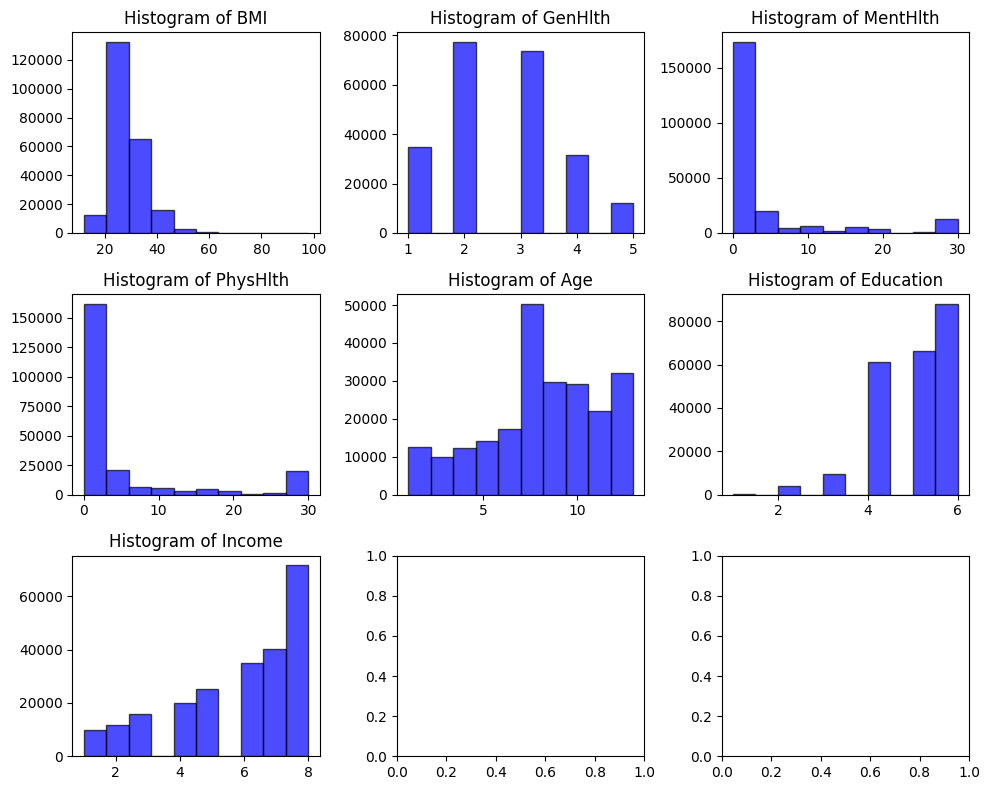

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(10, 8))  # 2x2 grid
columns = ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']  # Get column names

# Loop through columns and plot on subplots
for ax, col in zip(axes.flatten(), columns):
    ax.hist(df[col], alpha=0.7, color='blue', edgecolor='black')
    ax.set_title(f'Histogram of {col}')
    print(df[col].skew())

plt.tight_layout()  # Adjust layout for readability
plt.show()

-0.024652387895281007
1.6543321527720953
0.700377820799732
1.6543321527720953
0.4115177452696707
1.6543321527720953


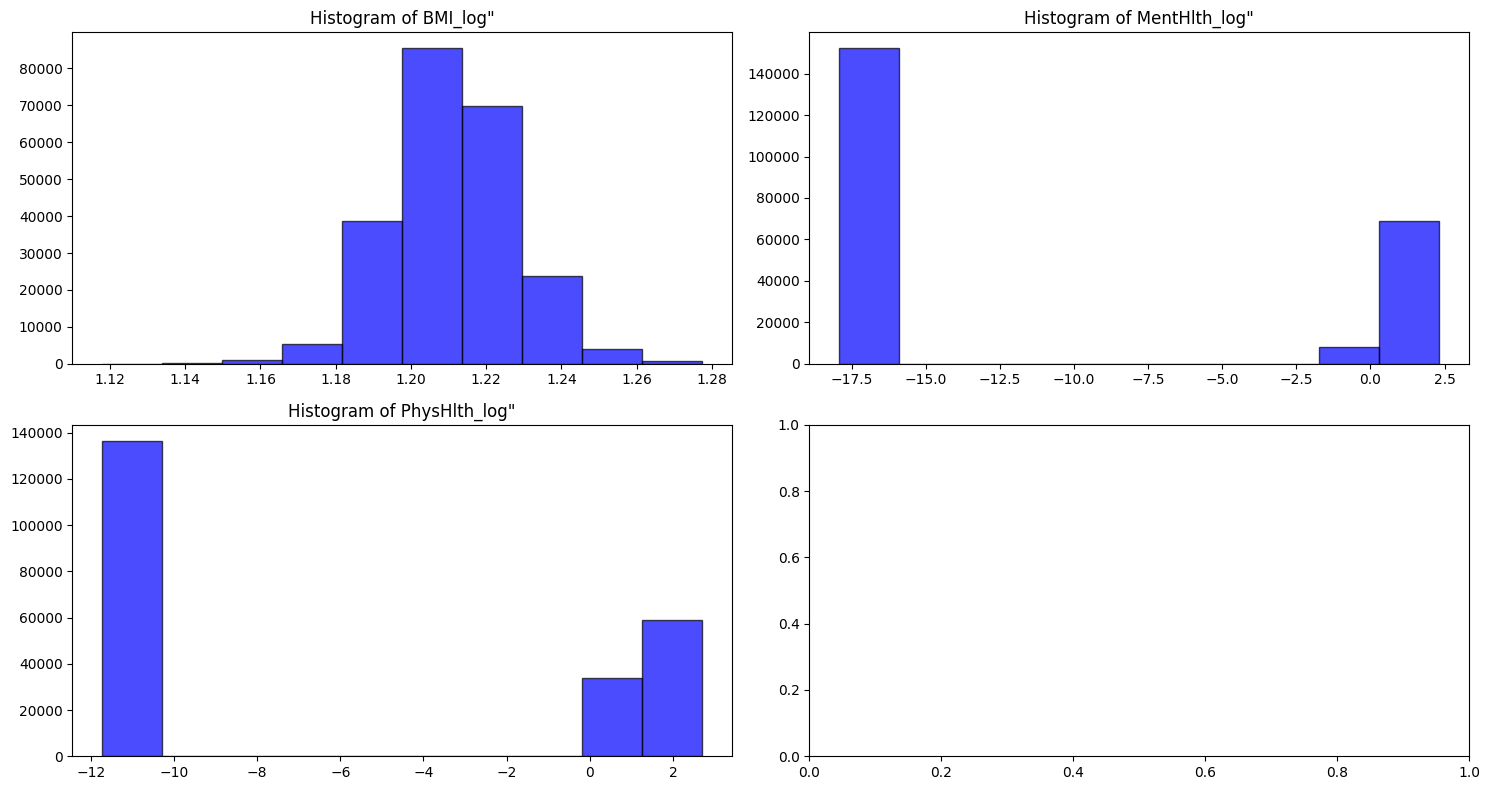

In [ ]:
fitted_lambda_dict = {}
for col in columns:
  df[f"{col}_log"] = df[col] + 0.001
  df[f"{col}_log"], fitted_lambda = boxcox(df[f"{col}_log"])
  fitted_lambda_dict[col] = fitted_lambda

fig, axes = plt.subplots(2, 2, figsize=(15, 8))  # 2x2 grid
columns_to_change = ['BMI', 'MentHlth', 'PhysHlth']  # Get column names

# Loop through columns and plot on subplots
for ax, col in zip(axes.flatten(), columns_to_change):
    ax.hist(df[f"{col}_log"], alpha=0.7, color='blue', edgecolor='black')
    ax.set_title(f'Histogram of {col}_log"')
    print(df[f"{col}_log"].skew())
    print(fitted_lambda)

plt.tight_layout()
plt.show()

In [ ]:
df.columns

Index(['index', 'Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits',
       'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
       'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age',
       'Education', 'Income', 'BMI_log', 'GenHlth_log', 'MentHlth_log',
       'PhysHlth_log', 'Age_log', 'Education_log', 'Income_log'],
      dtype='object')

In [ ]:
df_sampled = df.sample(frac=0.25, random_state=42)

In [ ]:
df_sampled['AgeBMI_log'] = (df_sampled['Age'] * df_sampled['BMI'])
df_sampled['HighRisk'] = df_sampled.apply(lambda row: 1 if row['Smoker'] == 1 or row['Stroke'] == 1 or row['HvyAlcoholConsump'] == 1 else 0, axis=1)
df_sampled['SuperHighRisk'] = df_sampled.apply(lambda row: 1 if row['Smoker'] == 1 and row['Stroke'] == 1 and row['HvyAlcoholConsump'] == 1 else 0, axis=1)
df_sampled['HighBP_Chol'] = df_sampled.apply(lambda row: 1 if row['HighBP'] == 1 or row['HighChol'] == 1 else 0, axis=1)
df_sampled['Fruits_Veggies'] = df_sampled.apply(lambda row: 1 if row['Fruits'] == 1 and row['Veggies'] == 1 else 0, axis=1)
df_sampled['Fruits_or_Veggies'] = df_sampled.apply(lambda row: 1 if row['Fruits'] == 1 or row['Veggies'] == 1 else 0, axis=1)
df_sampled['MaxHealth'] = df_sampled[['GenHlth', 'MentHlth', 'PhysHlth']].max(axis=1)
df_sampled['MinHealth'] = df_sampled[['GenHlth', 'MentHlth', 'PhysHlth']].min(axis=1)

In [ ]:
cols_to_drop = ['CholCheck', 'HvyAlcoholConsump', 'PhysActivity', 'HeartDiseaseorAttack', 'PhysActivity']

In [ ]:
X = df_sampled.drop(columns=['Diabetes_binary'])
X = X.drop(columns=['index', 'GenHlth_log', 'BMI', 'MentHlth_log', 'PhysHlth_log', 'Age_log', 'Education_log', 'Income_log'])
# X = X.drop(columns=cols_to_drop)

y = df_sampled['Diabetes_binary']

In [ ]:
print("Original distribution:", Counter(y))

Original distribution: Counter({0.0: 48550, 1.0: 8818})


In [ ]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# from imblearn.combine import SMOTEENN
# smote = SMOTE(sampling_strategy=0.9, random_state=42)
# # smote = SMOTEENN(sampling_strategy=0.6, random_state=42)

# X_train, y_train = smote.fit_resample(X_train, y_train)

In [ ]:
# log_transform_cols = ['BMI', 'MentHlth', 'PhysHlth', 'Education']  # Update to your skewed columns
# numeric_all = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
# numeric_cols = list(set(numeric_all) - set(log_transform_cols))

In [ ]:
# log_numeric_transformer = Pipeline(steps=[
#     ("imputer", SimpleImputer(strategy="mean")),
#     ("log", FunctionTransformer(func=np.log1p, inverse_func=np.expm1, validate=True)),
#     ("scaler", StandardScaler())
# ])

# numeric_transformer = Pipeline(steps=[
#     ("imputer", SimpleImputer(strategy="mean")),
#     ("scaler", StandardScaler())
# ])

# preprocessor = ColumnTransformer(transformers=[
#     ("log_num", log_numeric_transformer, log_transform_cols),
#     ("num", numeric_transformer, numeric_cols)
# ])

# pipeline = Pipeline(steps=[
#     ("preprocessor", preprocessor),
#     ("regressor", RandomForestClassifier(random_state=42))
# ])

# param_grid = {
#     "regressor__n_estimators": [50, 100],
#     "regressor__max_depth": [None, 10, 20]
# }

In [ ]:
%%time
rf = RandomForestClassifier(random_state=42)

param_grid = {
    "n_estimators": [50, 100],
    "max_depth": [None, 10, 20]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='recall', verbose=1)
grid_search.fit(X_res, y_res)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

NameError: name 'X_res' is not defined

In [ ]:
%%time
best_model = RandomForestClassifier(n_estimators = 100, max_depth = None, random_state=42, class_weight={0: 1.0, 1: 5.0})

best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

CPU times: user 12 s, sys: 41.2 ms, total: 12 s
Wall time: 12 s


In [ ]:
X.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'BMI_log', 'AgeBMI_log'],
      dtype='object')

In [ ]:
best_model.feature_importances_

array([0.03956863, 0.03050205, 0.00314979, 0.08536235, 0.03046734,
       0.01275614, 0.02171406, 0.02496302, 0.02983206, 0.02329584,
       0.00781631, 0.00731329, 0.01245007, 0.07089189, 0.04826735,
       0.06570744, 0.02427396, 0.02846082, 0.06956099, 0.05975171,
       0.0826346 , 0.08654411, 0.13471618])

In [ ]:
cols_to_drop = ['CholCheck', 'HvyAlcoholConsump', 'PhysActivity', 'HeartDiseaseorAttack', 'PhysActivity']

In [ ]:
r2 = r2_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"R² Score: {r2}")
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")

R² Score: -0.8348995766722496
Accuracy: 0.7641624542443786
Recall: 0.6271576524741082


In [ ]:
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

NameError: name 'grid_search' is not defined

In [ ]:
# DNN

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.metrics import Recall

In [ ]:
def focal_loss(gamma=2., alpha=0.25):
    def loss(y_true, y_pred):
        bce = tf.keras.backend.binary_crossentropy(y_true, y_pred)
        pt = tf.where(tf.equal(y_true, 1), y_pred, 1 - y_pred)
        return alpha * tf.pow(1. - pt, gamma) * bce
    return loss

In [ ]:
model = Sequential([
    Dense(128, activation='gelu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='gelu'),
    Dropout(0.2),
    Dense(32, activation='tanh'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # For binary classification
])

model.compile(optimizer='adam', loss=focal_loss(), metrics=['accuracy', Recall()])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.2, class_weight={0: 1.0, 1: 5.0})


Epoch 1/15
1148/1148 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.6900 - loss: 0.0603 - recall: 0.7113 - val_accuracy: 0.7092 - val_loss: 0.0326 - val_recall: 0.7579
Epoch 2/15
1148/1148 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7085 - loss: 0.0551 - recall: 0.7724 - val_accuracy: 0.7096 - val_loss: 0.0326 - val_recall: 0.7666
Epoch 3/15
1148/1148 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7175 - loss: 0.0541 - recall: 0.7765 - val_accuracy: 0.7255 - val_loss: 0.0324 - val_recall: 0.7269
Epoch 4/15
1148/1148 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7137 - loss: 0.0546 - recall: 0.7719 - val_accuracy: 0.6963 - val_loss: 0.0337 - val_recall: 0.7919
Epoch 5/15
1148/1148 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7063 - loss: 0.0546 - recall: 0.7833 - val_accuracy: 0.6934 - val_loss: 0.0350 - val_recall: 0.7868
Epoch 6/15
1148/1148 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7136 - loss: 0.0541 - recall: 0.7796 - val_accuracy: 0.6971 - val_loss: 0.0335 - val_recall

In [ ]:
y_pred_probs = model.predict(X_test).flatten()
y_pred = (y_pred_probs > 0.52).astype(int)

# 8. Report classification metrics
r2 = r2_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)
bal_acc = (recall + specificity) / 2

print(f"R² Score: {r2}")
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Balanced Accuracy: {bal_acc}")

359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
R² Score: -1.0010305435180369
Accuracy: 0.7428098309220847
Recall: 0.7031070195627158
F1 Score: 0.4530120481927711
Balanced Accuracy: 0.7265021539884244


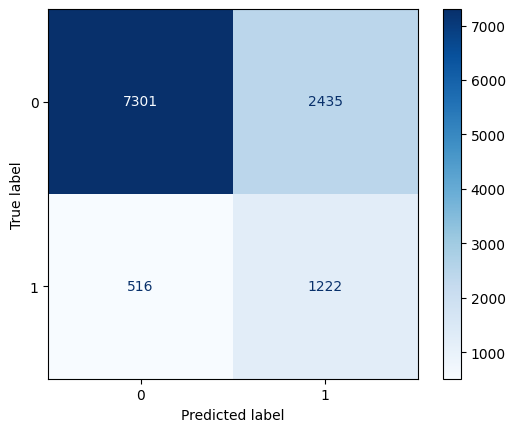

In [ ]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues')

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

In [ ]:
inputs = Input(shape=(X_train.shape[1],))
x = Dense(128, activation='gelu')(inputs)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='tanh')(x)
features = Dense(16, activation='gelu')(x)  # Hidden layer used as feature extractor
output = Dense(1, activation='sigmoid')(features)

nn_model = Model(inputs, output)
nn_model.compile(optimizer='adam', loss=focal_loss(), metrics=['accuracy', Recall()])

In [ ]:
nn_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0, class_weight={0: 1.0, 1: 4.0})

In [ ]:
feature_extractor = Model(inputs, features)
X_train_feat = feature_extractor.predict(X_train)
X_test_feat = feature_extractor.predict(X_test)


rf = RandomForestClassifier(random_state=42, class_weight={0: 1.0, 1: 5.0})
param_grid = {
    "n_estimators": [50, 100],
    "max_depth": [None, 10, 20]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='recall', verbose=1)
grid_search.fit(X_train_feat, y_train)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test_feat)

1435/1435 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Fitting 5 folds for each of 6 candidates, totalling 30 fits


In [ ]:
r2 = r2_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"R² Score: {r2}")
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")

R² Score: -0.9834003184650146
Accuracy: 0.7450758236011853
Recall: 0.6881472957422324


In [ ]:
nn_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0, class_weight={0: 1.0, 1: 4.0})

In [ ]:
nn_probs = nn_model.predict(X_test).flatten()


xgb_model = xgb.XGBClassifier(use_label_encoder=True, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
xgb_probs = xgb_model.predict_proba(X_test)[:, 1]

359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:37:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
ensemble_probs = (2*nn_probs + xgb_probs) / 2
ensemble_preds = (ensemble_probs > 0.57).astype(int)

r2 = r2_score(y_test, ensemble_preds)
accuracy = accuracy_score(y_test, ensemble_preds)
recall = recall_score(y_test, ensemble_preds)
f1 = f1_score(y_test, ensemble_preds)
tn, fp, fn, tp = confusion_matrix(y_test, ensemble_preds).ravel()
specificity = tn / (tn + fp)
bal_acc = (recall + specificity) / 2

print(f"R² Score: {r2}")
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Balanced Accuracy: {bal_acc}")

R² Score: -1.2180179287860042
Accuracy: 0.7149206902562315
Recall: 0.7330264672036824
F1 Score: 0.4378759236982299
Balanced Accuracy: 0.722357522837667


In [ ]:

nn_probs = nn_model.predict(X_test).flatten()
params = {'classifier__learning_rate': 0.1, 'classifier__max_depth': -1, 'classifier__n_estimators': 100}

neg = np.sum(y_train == 0)
pos = np.sum(y_train == 1)
scale_pos_weight = 2*neg / pos

lgb_model = lgb.LGBMClassifier(
    objective='binary',
    scale_pos_weight=scale_pos_weight,
    n_estimators=100,
    learning_rate=0.1,
    max_depth=-1,
    random_state=42
)

lgb_model.fit(X_train, y_train)
lgb_probs = lgb_model.predict_proba(X_test)[:, 1]

359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 7080, number of negative: 38814
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007462 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 211
[LightGBM] [Info] Number of data points in the train set: 45894, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.154269 -> initscore=-1.701507
[LightGBM] [Info] Start training from score -1.701507


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
ensemble_probs2 = (1.8*nn_probs + lgb_probs) / 2
ensemble_preds2 = (ensemble_probs2 > 0.8).astype(int)

r2 = r2_score(y_test, ensemble_preds2)
accuracy = accuracy_score(y_test, ensemble_preds2)
recall = recall_score(y_test, ensemble_preds2)
f1 = f1_score(y_test, ensemble_preds2)
tn, fp, fn, tp = confusion_matrix(y_test, ensemble_preds2).ravel()
specificity = tn / (tn + fp)
bal_acc = (recall + specificity) / 2

print(f"R² Score: {r2}")
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Balanced Accuracy: {bal_acc}")

R² Score: -1.0457841917295552
Accuracy: 0.7370576956597524
Recall: 0.7059838895281934
F1 Score: 0.4485468835679035
Balanced Accuracy: 0.7242943276728888


In [ ]:
a = 2.9
b = 1
c = 1
t = 0.75

ensemble_probs3 = (a*nn_probs + b*xgb_probs + c*lgb_probs) / 3
ensemble_preds3 = (ensemble_probs3 > t).astype(int)

r2 = r2_score(y_test, ensemble_preds3)
accuracy = accuracy_score(y_test, ensemble_preds3)
recall = recall_score(y_test, ensemble_preds3)
f1 = f1_score(y_test, ensemble_preds3)
tn, fp, fn, tp = confusion_matrix(y_test, ensemble_preds3).ravel()
specificity = tn / (tn + fp)
bal_acc = (recall + specificity) / 2

print(f"R² Score: {r2:.3f}")
print(f"Accuracy: {accuracy:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"Balanced Accuracy: {bal_acc:.3f}")

R² Score: -1.236
Accuracy: 0.713
Recall: 0.742
F1 Score: 0.439
Balanced Accuracy: 0.725


In [ ]:
df.columns

Index(['index', 'Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits',
       'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
       'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age',
       'Education', 'Income', 'BMI_log', 'GenHlth_log', 'MentHlth_log',
       'PhysHlth_log', 'Age_log', 'Education_log', 'Income_log'],
      dtype='object')

In [ ]:
df_sampled = df.sample(frac=0.25, random_state=42)

In [ ]:
df_sampled['AgeBMI_log'] = (df_sampled['Age'] * df_sampled['BMI'])
df_sampled['HighRisk'] = df_sampled.apply(lambda row: 1 if row['Smoker'] == 1 or row['Stroke'] == 1 or row['HvyAlcoholConsump'] == 1 else 0, axis=1)
df_sampled['SuperHighRisk'] = df_sampled.apply(lambda row: 1 if row['Smoker'] == 1 and row['Stroke'] == 1 and row['HvyAlcoholConsump'] == 1 else 0, axis=1)
df_sampled['HighBP_Chol'] = df_sampled.apply(lambda row: 1 if row['HighBP'] == 1 or row['HighChol'] == 1 else 0, axis=1)
df_sampled['Fruits_Veggies'] = df_sampled.apply(lambda row: 1 if row['Fruits'] == 1 and row['Veggies'] == 1 else 0, axis=1)
df_sampled['Fruits_or_Veggies'] = df_sampled.apply(lambda row: 1 if row['Fruits'] == 1 or row['Veggies'] == 1 else 0, axis=1)
df_sampled['MaxHealth'] = df_sampled[['GenHlth', 'MentHlth', 'PhysHlth']].max(axis=1)
df_sampled['MinHealth'] = df_sampled[['GenHlth', 'MentHlth', 'PhysHlth']].min(axis=1)

In [ ]:
X = df_sampled.drop(columns=['Diabetes_binary'])
X = X.drop(columns=['index', 'GenHlth_log', 'BMI', 'MentHlth_log', 'PhysHlth_log', 'Age_log', 'Education_log', 'Income_log'])
# X = X.drop(columns=cols_to_drop)

y = df_sampled['Diabetes_binary']

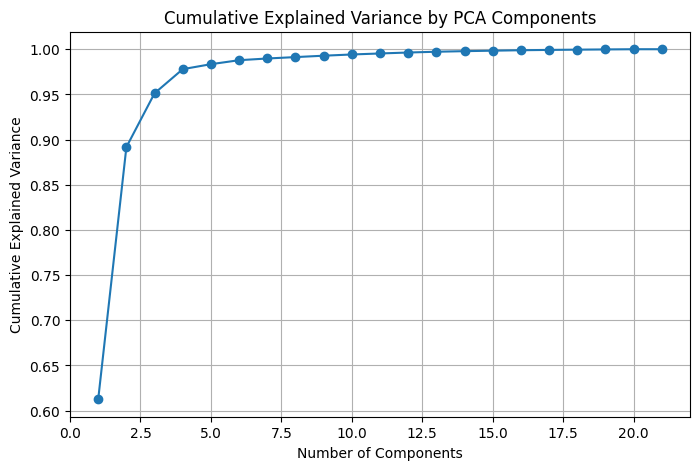

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         pca.explained_variance_ratio_.cumsum(), marker='o')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [ ]:
pca = PCA(n_components=15)
X_reduced = pca.fit_transform(X_scaled)

In [ ]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, stratify=y,
                                                              test_size=0.25, random_state=42)

# Split training into training + validation (for meta-learner)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full,
                                                  stratify=y_train_full,test_size=0.25, random_state=42)

# Scale
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# SMOTE
# X_train, y_train = SMOTE(sampling_strategy=0.6, random_state=42).fit_resample(X_train, y_train)

In [ ]:
# Neural Net
nn_model = Sequential([
    Dense(128, activation='gelu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='gelu'),
    Dropout(0.2),
    Dense(32, activation='tanh'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # For binary classification
])
nn_model.compile(optimizer='adam', loss=focal_loss(), metrics=['accuracy', Recall()])
nn_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0, class_weight={0: 1.0, 1: 4.0})

# LGBM
neg = np.sum(y_train == 0)
pos = np.sum(y_train == 1)
scale_pos_weight = 2*neg / pos

lgb_model = lgb.LGBMClassifier(
    objective='binary',
    scale_pos_weight=scale_pos_weight,
    n_estimators=100,
    learning_rate=0.1,
    max_depth=-1,
    random_state=42
)

lgb_model.fit(X_train, y_train)
lgb_probs = lgb_model.predict_proba(X_test)[:, 1]

# XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Create meta-features from validation set ---

val_nn_probs = nn_model.predict(X_val).flatten()
val_lgb_probs = lgb_model.predict_proba(X_val)[:, 1]
val_xgb_probs = xgb_model.predict_proba(X_val)[:, 1]

val_nn_probs_sq = np.square(val_nn_probs)
val_rf_probs_sq = np.square(val_lgb_probs)
val_xgb_probs_sq = np.square(val_xgb_probs)

val_nn_probs_log = np.log1p(val_nn_probs)
val_rf_probs_log = np.log1p(val_lgb_probs)
val_xgb_probs_log = np.log1p(val_xgb_probs)

val_nn_probs_cb = np.power(val_nn_probs, 3)
val_rf_probs_cb = np.power(val_lgb_probs, 3)
val_xgb_probs_cb = np.power(val_xgb_probs, 3)

# X_meta_train = np.column_stack((val_nn_probs, val_rf_probs))


# X_meta_train = np.column_stack((val_nn_probs, val_rf_probs, val_xgb_probs,
#                                 val_nn_probs_sq, val_rf_probs_sq, val_xgb_probs_sq,
#                                 val_nn_probs_cb, val_rf_probs_cb, val_xgb_probs_cb))

# Train meta-learner ---

X_meta_train = np.column_stack((3*val_nn_probs,
                                val_lgb_probs,
                                val_xgb_probs))

# Engineered features
prob_mean = np.mean(X_meta_train, axis=1)
prob_std = np.std(X_meta_train, axis=1)
prob_max = np.max(X_meta_train, axis=1)
prob_min = np.min(X_meta_train, axis=1)
prob_range = prob_max - prob_min
dist_05 = np.abs(X_meta_train - 0.5)

X_meta_feat = np.column_stack((
    X_meta_train,
    prob_mean,
    prob_std,
    prob_range,
    dist_05[:, 0],
    dist_05[:, 1],
    dist_05[:, 2],
))

# meta_model = RandomForestClassifier(n_estimators=100, random_state=42)
# meta_model.fit(X_meta_train, y_val)

class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_val),
    y=y_train
)
class_weights = dict(enumerate(class_weights))

meta_model = Sequential([
    Dense(64, activation='gelu', input_shape=(X_meta_feat.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='tanh'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # For binary classification
])

meta_model.compile(optimizer='adam', loss=focal_loss(),
                   metrics=['accuracy', Recall()])
meta_model.fit(X_meta_feat, y_val, epochs=10, batch_size=32,
               verbose=0, class_weight=class_weights)

# Generate test set meta-features ---
test_nn_probs = nn_model.predict(X_test).flatten()
test_lgb_probs = lgb_model.predict_proba(X_test)[:, 1]
test_xgb_probs = xgb_model.predict_proba(X_test)[:, 1]

test_nn_probs_sq = np.square(test_nn_probs)
test_lgb_probs_sq = np.square(test_lgb_probs)
test_xgb_probs_sq = np.square(test_xgb_probs)

test_nn_probs_cb = np.power(test_nn_probs, 3)
test_lgb_probs_cb = np.power(test_lgb_probs, 3)
test_xgb_probs_cb = np.power(test_xgb_probs, 3)

test_nn_probs_log = np.log1p(test_nn_probs)
test_lgb_probs_log = np.log1p(test_lgb_probs)
test_xgb_probs_log = np.log1p(test_xgb_probs)

# X_meta_test = np.column_stack((test_nn_probs, test_rf_probs))

X_meta_test = np.column_stack((3*test_nn_probs, test_lgb_probs, test_xgb_probs))

prob_mean = np.mean(X_meta_test, axis=1)
prob_std = np.std(X_meta_test, axis=1)
prob_max = np.max(X_meta_test, axis=1)
prob_min = np.min(X_meta_test, axis=1)
prob_range = prob_max - prob_min
dist_05 = np.abs(X_meta_test - 0.5)

X_meta_test_feat = np.column_stack((
    X_meta_test,
    prob_mean,
    prob_std,
    prob_range,
    dist_05[:, 0],
    dist_05[:, 1],
    dist_05[:, 2],
))
# X_meta_test = np.column_stack((test_nn_probs, test_rf_probs, test_xgb_probs,
#                                test_nn_probs_sq, test_rf_probs_sq, test_xgb_probs_sq,
#                                test_nn_probs_cb, test_rf_probs_cb, test_xgb_probs_cb))

# Predict and evaluate ---
# y_pred_meta = meta_model.predict(X_meta_test)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 4960, number of negative: 27309
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006412 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 209
[LightGBM] [Info] Number of data points in the train set: 32269, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.153708 -> initscore=-1.705811
[LightGBM] [Info] Start training from score -1.705811


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:23:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


449/449 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
y_pred_probs = meta_model.predict(X_meta_test_feat).flatten()
y_pred_meta = (y_pred_probs > 0.48).astype(int)

r2 = r2_score(y_test, y_pred_meta)
accuracy = accuracy_score(y_test, y_pred_meta)
recall = recall_score(y_test, y_pred_meta)
f1 = f1_score(y_test, y_pred_meta)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_meta).ravel()
specificity = tn / (tn + fp)
bal_acc = (recall + specificity) / 2

print(f"R² Score: {r2:.3f}")
print(f"Accuracy: {accuracy:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"Bal. Accuracy: {bal_acc:.3f}")

449/449 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
R² Score: -1.254
Accuracy: 0.707
Recall: 0.772
F1 Score: 0.447
Bal. Accuracy: 0.733


In [ ]:
# For neural network
y_nn_pred = (test_nn_probs > 0.5).astype(int)
print("NN Recall:", recall_score(y_test, y_nn_pred))
y_nn_pred = (test_nn_probs > 0.5).astype(int)
print("NN Accuracy:", accuracy_score(y_test, y_nn_pred))
y_nn_pred = (test_nn_probs > 0.5).astype(int)
print("NN f1:", f1_score(y_test, y_nn_pred))

# For Random Forest
y_lgb_pred = (test_lgb_probs > 0.5).astype(int)
print("RF Recall:", recall_score(y_test, y_lgb_pred))
y_lgb_pred = (test_lgb_probs > 0.5).astype(int)
print("RF Accuracy:", accuracy_score(y_test, y_lgb_pred))
y_lgb_pred = (test_lgb_probs > 0.5).astype(int)
print("RF f1:", f1_score(y_test, y_lgb_pred))

# For XGBoost
y_xgb_pred = (test_xgb_probs > 0.5).astype(int)
print("XGBoost Recall:", recall_score(y_test, y_xgb_pred))
y_xgb_pred = (test_xgb_probs > 0.5).astype(int)
print("XGBoost Accuracy:", accuracy_score(y_test, y_xgb_pred))
y_xgb_pred = (test_xgb_probs > 0.5).astype(int)
print("XGBoost f1:", f1_score(y_test, y_xgb_pred))

# Meta model
print("Meta-model Recall:", recall_score(y_test, y_pred_meta))
print("Meta-model Accuracy:", accuracy_score(y_test, y_pred_meta))
print("Meta-model f1:", f1_score(y_test, y_pred_meta))

NN Recall: 0.6833030852994555
NN Accuracy: 0.7567284897503835
NN f1: 0.4633133364097831
RF Recall: 0.8847549909255898
RF Accuracy: 0.6113512759726677
RF f1: 0.4116529449018366
XGBoost Recall: 0.18738656987295826
XGBoost Accuracy: 0.8454887742295356
XGBoost f1: 0.2715318869165023
Meta-model Recall: 0.17286751361161526
Meta-model Accuracy: 0.8378887184493097
Meta-model f1: 0.2468415937803693


In [ ]:
y_meta_probs = meta_model.predict_proba(X_meta_test)[:, 1]

# Try lower thresholds
for t in [0.5, 0.4, 0.3, 0.2, 0.15, 0.1]:
    y_thresh_pred = (y_meta_probs > t).astype(int)
    print(f"Threshold {t:} → Recall: {recall_score(y_test, y_thresh_pred):.3f}")
    print(f"Threshold {t:} → Accuracy: {accuracy_score(y_test, y_thresh_pred):.3f}")
    print(f"Threshold {t:} → F1: {f1_score(y_test, y_thresh_pred):.3f}")

Threshold 0.5 → Recall: 0.173
Threshold 0.5 → Accuracy: 0.838
Threshold 0.5 → F1: 0.247
Threshold 0.4 → Recall: 0.288
Threshold 0.4 → Accuracy: 0.826
Threshold 0.4 → F1: 0.337
Threshold 0.3 → Recall: 0.436
Threshold 0.3 → Accuracy: 0.796
Threshold 0.3 → F1: 0.396
Threshold 0.2 → Recall: 0.630
Threshold 0.2 → Accuracy: 0.738
Threshold 0.2 → F1: 0.425
Threshold 0.15 → Recall: 0.715
Threshold 0.15 → Accuracy: 0.693
Threshold 0.15 → F1: 0.417
Threshold 0.1 → Recall: 0.805
Threshold 0.1 → Accuracy: 0.637
Threshold 0.1 → F1: 0.405
